In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [2]:
import pickle

In [3]:
with open('boards.pkl','rb') as f: boards = pickle.load(f)

In [4]:
import matplotlib.pyplot as plt

In [5]:
#for MOVE in range(boards.shape[0]):
    #plt.figure()
    #plt.imshow(boards[MOVE])

In [6]:
from copy import deepcopy

In [7]:
moves = []
pred = []
for MOVE in range(boards.shape[0] - 1):
    moves.append(boards[MOVE].reshape(6*7))
    pred.append(deepcopy(boards[MOVE+1].reshape(6*7)))

In [8]:
#Normalize pred
for MOVE in range(boards.shape[0] - 1):
    pred[MOVE] -= deepcopy(moves[MOVE])
    if pred[MOVE].sum() > 1:
        pred[MOVE] /= 2

In [9]:
moves = np.array(moves)
pred = np.array(pred)

In [10]:
#Remove transitions between games
index = np.abs(pred.sum(1)) == 1
moves = moves[index]
pred = pred[index]

In [21]:
moves[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0.])

In [22]:
pred[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0.])

In [11]:
model = Sequential()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=8)
model.add(keras.Input(shape=(42)))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(42, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               8600      
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 42)                8442      
                                                                 
Total params: 17,042
Trainable params: 17,042
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(moves,pred, batch_size=128,
          epochs=200,  callbacks=[callback], validation_split=0.1)

Epoch 1/200
7/7 [==============================] - 1s 53ms/step - loss: 3.8696 - accuracy: 0.0213 - val_loss: 3.7760 - val_accuracy: 0.0213
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 3.7347 - accuracy: 0.0533 - val_loss: 3.6902 - val_accuracy: 0.0638
Epoch 3/200
7/7 [==============================] - 0s 7ms/step - loss: 3.6364 - accuracy: 0.0710 - val_loss: 3.6283 - val_accuracy: 0.1064
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 3.5512 - accuracy: 0.1053 - val_loss: 3.5740 - val_accuracy: 0.1170
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 3.4768 - accuracy: 0.1314 - val_loss: 3.5221 - val_accuracy: 0.1277
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 3.4345 - accuracy: 0.1266 - val_loss: 3.4695 - val_accuracy: 0.1596
Epoch 7/200
7/7 [==============================] - 0s 6ms/step - loss: 3.3465 - accuracy: 0.1609 - val_loss: 3.4171 - val_accuracy: 0.1702
Epoch 8/200
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 1.5596 - accuracy: 0.5420 - val_loss: 1.9979 - val_accuracy: 0.3617
Epoch 60/200
7/7 [==============================] - 0s 6ms/step - loss: 1.5837 - accuracy: 0.5231 - val_loss: 1.9645 - val_accuracy: 0.3830
Epoch 61/200
7/7 [==============================] - 0s 6ms/step - loss: 1.5704 - accuracy: 0.5254 - val_loss: 1.9588 - val_accuracy: 0.3936
Epoch 62/200
7/7 [==============================] - 0s 6ms/step - loss: 1.5506 - accuracy: 0.5325 - val_loss: 1.9785 - val_accuracy: 0.3936
Epoch 63/200
7/7 [==============================] - 0s 6ms/step - loss: 1.5409 - accuracy: 0.5420 - val_loss: 1.9742 - val_accuracy: 0.4149
Epoch 64/200
7/7 [==============================] - 0s 6ms/step - loss: 1.5178 - accuracy: 0.5491 - val_loss: 1.9591 - val_accuracy: 0.4255
Epoch 65/200
7/7 [==============================] - 0s 6ms/step - loss: 1.5021 - accuracy: 0.5432 - val_loss: 1.9519 - val_accuracy: 0.3830
Epoch 66/200
7/7 [===============

7/7 [==============================] - 0s 7ms/step - loss: 1.1606 - accuracy: 0.6462 - val_loss: 1.9089 - val_accuracy: 0.3723
Epoch 118/200
7/7 [==============================] - 0s 6ms/step - loss: 1.1531 - accuracy: 0.6450 - val_loss: 1.9102 - val_accuracy: 0.3723
Epoch 119/200
7/7 [==============================] - 0s 6ms/step - loss: 1.1244 - accuracy: 0.6497 - val_loss: 1.9241 - val_accuracy: 0.3723
Epoch 120/200
7/7 [==============================] - 0s 6ms/step - loss: 1.1128 - accuracy: 0.6556 - val_loss: 1.8920 - val_accuracy: 0.3723
Epoch 121/200
7/7 [==============================] - 0s 6ms/step - loss: 1.1362 - accuracy: 0.6355 - val_loss: 1.8809 - val_accuracy: 0.3617
Epoch 122/200
7/7 [==============================] - 0s 6ms/step - loss: 1.1472 - accuracy: 0.6402 - val_loss: 1.8760 - val_accuracy: 0.3723
Epoch 123/200
7/7 [==============================] - 0s 6ms/step - loss: 1.1120 - accuracy: 0.6651 - val_loss: 1.8876 - val_accuracy: 0.3617
Epoch 124/200
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.9028 - accuracy: 0.7148 - val_loss: 1.9629 - val_accuracy: 0.4362
Epoch 176/200
7/7 [==============================] - 0s 6ms/step - loss: 0.9202 - accuracy: 0.7089 - val_loss: 1.9704 - val_accuracy: 0.4255
Epoch 177/200
7/7 [==============================] - 0s 6ms/step - loss: 0.9491 - accuracy: 0.7065 - val_loss: 1.9402 - val_accuracy: 0.4362
Epoch 178/200
7/7 [==============================] - 0s 6ms/step - loss: 0.9512 - accuracy: 0.7018 - val_loss: 1.9554 - val_accuracy: 0.4255
Epoch 179/200
7/7 [==============================] - 0s 6ms/step - loss: 0.9232 - accuracy: 0.7219 - val_loss: 1.9947 - val_accuracy: 0.4255
Epoch 180/200
7/7 [==============================] - 0s 6ms/step - loss: 0.9109 - accuracy: 0.7124 - val_loss: 1.9903 - val_accuracy: 0.4255
Epoch 181/200
7/7 [==============================] - 0s 6ms/step - loss: 0.9021 - accuracy: 0.7030 - val_loss: 1.9725 - val_accuracy: 0.4149
Epoch 182/200
7/7 [========

In [29]:
#Board to give model to predict next move
new_board = [
[0., 0., 0., 0., 0., 0., 0.],
[0., 0., 0., 0., 0., 0., 0.],
[0., 0., 0., 0., 0., 0., 0.],
[0., 0., 0., 1., 0., 2., 0.],
[0., 0., 0., 1., 0., 2., 0.],
[0., 0., 0., 1., 0., 2., 0.]]

In [30]:
#Reshaped input board for model
shaped_board = np.array(new_board).reshape(1, 42)

1/1 [==============================] - 0s 61ms/step


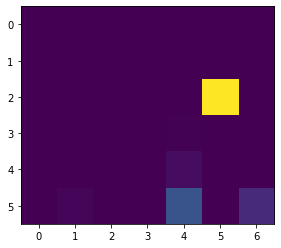

In [31]:
#Predict the next move and output heat map
predicted = model.predict(shaped_board)
plt.imshow(predicted.reshape(6,7))

In [32]:
out = deepcopy(predicted)

In [33]:
#Decide on highest probability move
value = out.argmax(axis=1)
while shaped_board[0][value] == 1:
    out[0][value] = 0
    value = out.argmax(axis=1)
value[0]

19

In [34]:
#Output next move 
space = 0
while space < 42:
    if space == value:
        out[0][space] = 1
    else:
        out[0][space] = 0
    space = space + 1
out.reshape(6,7)

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)